#Carlyle Davis, Homework 1, week 3

In [43]:
%pylab inline
import pylab as pl
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


**1. GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 6 different distributions (600 samples in total), all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 2 more of your choice. **

In [44]:
mymean = 100
sigma = 1

In [45]:
#sizes of each of the distribution run.  evenly spaced between 10 and 2k ,100 total numbers
sizes = np.linspace(10,2000,100)

In [46]:
#do a nested dict and can put all dists into the same dict with a 
#different key value pair

distr = {}

distr['chisq'] = {}
distr['pois'] = {}
distr['norm'] = {}
distr['unif'] = {}
distr['gamma'] = {}
distr['binomial'] = {}


In [47]:
#seed the random number generator
np.random.seed(seed=100)

#make 100 runs of each of the below distributions of diferent sizes with a mean of 100
for n in sizes:
    distr['chisq'][n] = np.random.chisquare(100,n)
    distr['pois'][n] = np.random.poisson(lam=100, size=n)
    distr['norm'][n] = np.random.normal(loc=100,scale=1,size=n)
    distr['unif'][n] = np.random.uniform(199,1,size=n)
    distr['gamma'][n] = np.random.gamma(100, size = n)
    distr['binomial'][n] = np.random.binomial(200, 0.5, size = n)
    

**2. For each sample plot the sample mean against the sample size N (if you want you can do it with the sample standard deviation as well).  Describe the behavior you see in the plots - do they look as you expected? why? **

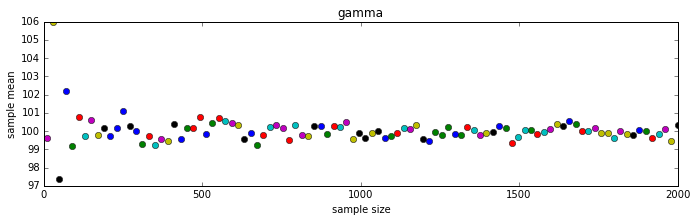

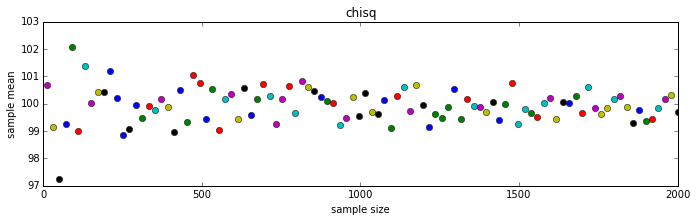

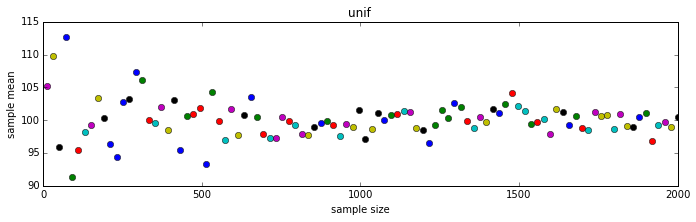

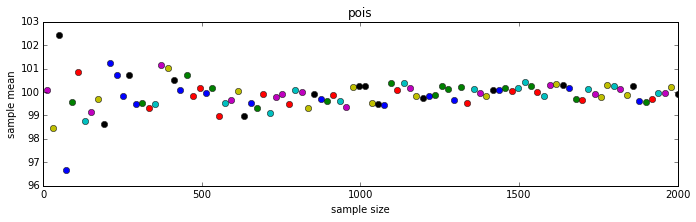

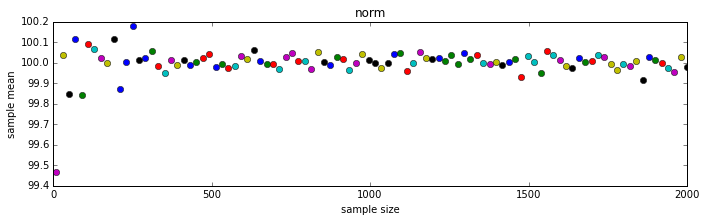

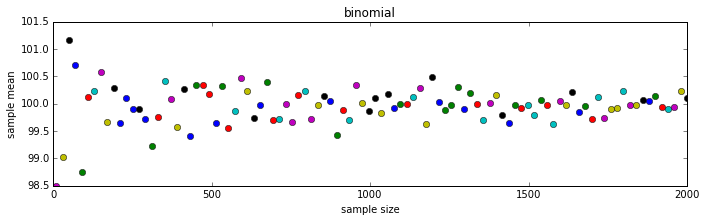

In [48]:
#create dictionary of distribution means so I can loop through when graphing

means = {}
means['chisq'] = {}
means['pois'] = {}
means['norm'] = {}
means['unif'] = {}
means['gamma'] = {}
means['binomial'] = {}

#plot all of above distributions
plotnum = 0
for i in means.keys():
    plotnum +=1
    fig = pl.figure(figsize=(25,10))
    ax_sub = "ax_{0}".format(i)
    name = "{0}".format(i)
    for run in distr[i].keys():
        ax_sub = fig.add_subplot(3,2,plotnum)
        means[i][run] = distr[i][run].mean()
        #and plot it
        ax_sub.plot(run, means[i][run], 'o')
        ax_sub.set_xlabel('sample size')
        ax_sub.set_ylabel('sample mean')
        ax_sub.set_title(name)
 

**3. PLOT the distributions of all sample means (together for all distributions). 
Mandatory  - plot is as a histogram, 
Optional - plot it  in any other way you think is convincing
**

In [49]:
#create list of all means from above distributions
allmeans=[]

for n in means['pois']:
    allmeans.append(means['pois'][n])
for n in means['chisq']:
    allmeans.append(means['chisq'][n])
for n in means['norm']:
    allmeans.append(means['norm'][n])
for n in means['unif']:
    allmeans.append(means['unif'][n])
for n in means['gamma']:
    allmeans.append(means['gamma'][n])
for n in means['binomial']:
    allmeans.append(means['binomial'][n])


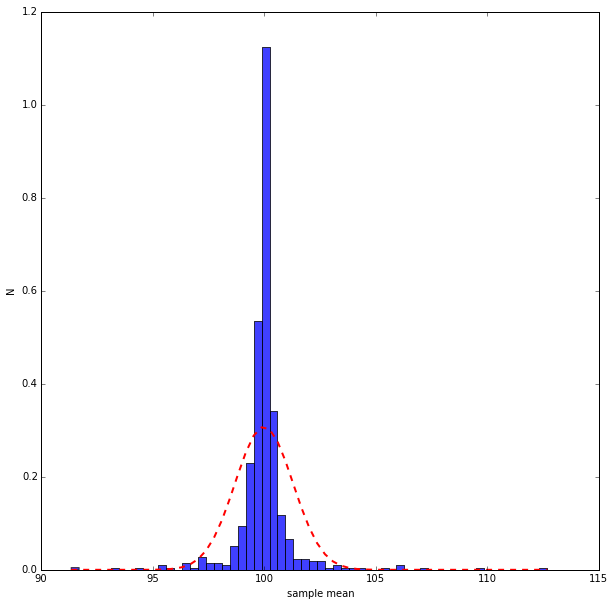

In [50]:
    
pl.figure(figsize=(10,10))

# best fit of data
(mean, sd) = norm.fit(allmeans)

#plot histogram
n, bins, patches = plt.hist(allmeans, 60, normed=1, facecolor='blue', alpha=0.75)

pl.xlabel('sample mean')
pl.ylabel('N')

# add a 'best fit' line
y = mlab.normpdf( bins, mean, sd)
l = pl.plot(bins, y, 'r--', linewidth=2)
